In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU

from tensorflow.keras.models import load_model

from plot_keras_history import plot_history

In [2]:
df = pd.read_csv('Dataset.csv')
df.head()

,Unnamed: 0,batting_team,bowling_team,over,ball,total_runs,wicket left,runs required,run rate,winner,season
0,0,1.0,0.0,1.0,1.0,1.0,10.0,206.0,0.909091,0.0,2017.0
1,1,1.0,0.0,1.0,2.0,1.0,10.0,206.0,0.833333,0.0,2017.0
2,2,1.0,0.0,1.0,3.0,1.0,10.0,206.0,0.769231,0.0,2017.0
3,3,1.0,0.0,1.0,4.0,3.0,10.0,204.0,2.142857,0.0,2017.0
4,4,1.0,0.0,1.0,5.0,7.0,10.0,200.0,4.666667,0.0,2017.0


In [3]:
df.drop(['Unnamed: 0','batting_team','bowling_team'],axis=1,inplace=True)

In [4]:
df.head()

,over,ball,total_runs,wicket left,runs required,run rate,winner,season
0,1.0,1.0,1.0,10.0,206.0,0.909091,0.0,2017.0
1,1.0,2.0,1.0,10.0,206.0,0.833333,0.0,2017.0
2,1.0,3.0,1.0,10.0,206.0,0.769231,0.0,2017.0
3,1.0,4.0,3.0,10.0,204.0,2.142857,0.0,2017.0
4,1.0,5.0,7.0,10.0,200.0,4.666667,0.0,2017.0


In [5]:
def create_dataset(dataset,time_stamp=6):
    X,Y = [],[]
    for i in range(len(dataset)-time_stamp-1):
        a = dataset[i:(i+time_stamp),:-1]
        X.append(a)
        Y.append(dataset[i+time_stamp,-1])
    return np.array(X), np.array(Y)

In [6]:
train_df = df[df['season']<=2017]
test_df = df[df['season']>2017]

In [7]:
train_df.drop(['season'],axis=1,inplace=True)
test_df.drop(['season'],axis=1,inplace=True)

c:\users\hp\anaconda3\envs\tf\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
stamp=6
x_train, y_train = create_dataset(train_df.values, time_stamp=stamp)

x_test, y_test = create_dataset(test_df.values, time_stamp=stamp)

In [9]:
x_train.shape

(131491, 6, 6)

Epoch 1/10
4110/4110 [==============================] - 58s 14ms/step - loss: 0.4719 - accuracy: 0.7670 - val_loss: 0.5638 - val_accuracy: 0.7059
Epoch 2/10
4110/4110 [==============================] - 60s 15ms/step - loss: 0.4568 - accuracy: 0.7771 - val_loss: 0.5645 - val_accuracy: 0.7126
Epoch 3/10
4110/4110 [==============================] - 49s 12ms/step - loss: 0.4521 - accuracy: 0.7782 - val_loss: 0.5586 - val_accuracy: 0.7122
Epoch 4/10
4110/4110 [==============================] - 50s 12ms/step - loss: 0.4482 - accuracy: 0.7789 - val_loss: 0.5346 - val_accuracy: 0.7044
Epoch 5/10
4110/4110 [==============================] - 50s 12ms/step - loss: 0.4467 - accuracy: 0.7802 - val_loss: 0.5956 - val_accuracy: 0.6958
Epoch 6/10
4110/4110 [==============================] - 49s 12ms/step - loss: 0.4440 - accuracy: 0.7809 - val_loss: 0.5901 - val_accuracy: 0.6993
Epoch 7/10
4110/4110 [==============================] - 51s 12ms/step - loss: 0.4434 - accuracy: 0.7816 - val_loss: 0.5656 -

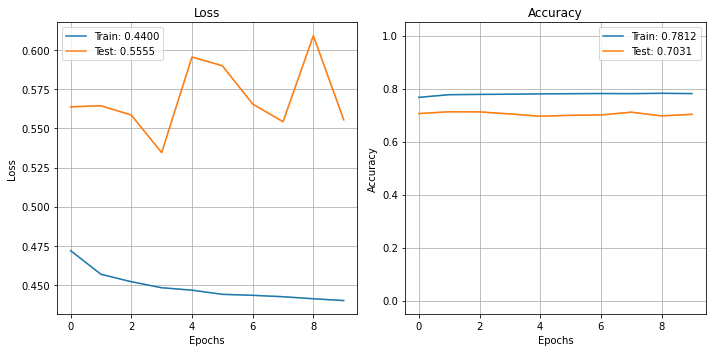

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(6,6)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test)).history
plot_history(history)

In [11]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(x_test)

In [12]:
model.save('ipl.h5')